# Initial experiments

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from IPython.core.pylabtools import figsize

from ipywidgets import widgets
from IPython.display import display

import numpy as np
import torch
import os

from agents import PolicyLearning

In [2]:
performance = pd.DataFrame(columns=['mu', 'sigma', 'util', 'action', 'actionvar'])

for mu in [0.1, 0.2, 0.5]:
    for sigma in [0.1, 0.2, 0.5]:
        for util in ['linear', 'sqrt', 'log']:
            directory = f'lightning_logs/initialCharacterize/mu{mu}sigma{sigma}util{util}/'
            file = os.listdir(directory)[0]
            model = PolicyLearning.load_from_checkpoint(f'{directory}{file}')

            states = torch.randint(10, (500, 3)) * torch.cat([torch.rand( 500, 2), torch.ones(500, 1)], 1)
            
            actions = model.sampleActions(states)
            row = pd.DataFrame(data={'mu':mu, 'sigma':sigma, 'util':util, 'action':actions.mean().item(), 
                                    'actionvar':actions.var().item()}, index=[0])
            performance = pd.concat([performance, row], ignore_index=True)
            


In [4]:
performance

,mu,sigma,util,action,actionvar
0,0.1,0.1,linear,0.500000,0.000000
1,0.1,0.1,sqrt,0.524000,0.018461
2,0.1,0.1,log,0.990246,0.000145
3,0.1,0.2,linear,0.500000,0.000000
4,0.1,0.2,sqrt,0.500000,0.000000
5,0.1,0.2,log,0.978891,0.000396
6,0.1,0.5,linear,0.944226,0.002321
7,0.1,0.5,sqrt,0.500000,0.000000
8,0.1,0.5,log,0.121710,0.045827
9,0.2,0.1,linear,0.540000,0.018437


### Observations

1. The learners do find consistent strategies, for the most part. Sampling over states, the variance of the allocations is usually quite low. However, there are some execeptions, which may bear more investigation.

2. The learners only seem to find three strategies: approximately, 0%, 50%, and 100% allocation to the risky asset.



### Solving the portfolio optimization problem analytically,
we find that the allocation to the risky asset, $w$, should be:
$$ w = \frac{q \mu}{2 \sigma} $$

If the $q$ factor, which captures the investor's risk tolerence is constant, this should give a multiplier on the underlying $\mu / \sigma$ relationship



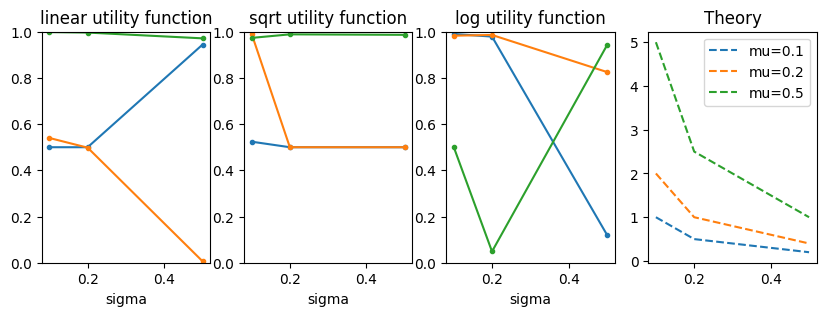

In [59]:
figsize(10, 3)
plt.subplots(1, 4)

for i in range(3):
    util = ['linear', 'sqrt', 'log'][i]
    
    plt.subplot(1,4,i+1)
    plt.title(f'{util} utility function')
    plt.ylim([0,1])
    plt.xlabel('sigma')
    for mu in [0.1, 0.2, 0.5]:
        toPlot = performance[['sigma', 'action']][(performance.util==util) & (performance.mu==mu)].set_index('sigma')
        plt.plot(toPlot, '.-', label=f'mu={mu}');
        

        


plt.subplot(1,4,4)
plt.title(f'Theory')

for mu in [0.1, 0.2,0.5]:
    plt.plot(np.array([0.1, 0.2, 0.5]), mu / np.array([0.1, 0.2, 0.5]), '--', label=f'mu={mu}')
        
plt.legend()

Some of these curves make no sense at all.

1. Why do the curves go up? i.e. holding more of the risky asset when sigma is greater?

2. Why would higher average return lead to lower holdings of the risky asset?

3. I thought that linear utility should allocate everything to the risky asset, since it should be simply optimizing for expected value.

The theory curves should be scaled by a constant factor, and max out at one.


#### There is probably an issue with the learning here, but maybe also with the way that I use utility functions to 